<a href="https://colab.research.google.com/github/Martinccv/Clases-DS/blob/main/Clase24_Optimizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimización de hiperparámetros

En esta clase vamos a trabajar con un dataset que contiene características y precios de autos.

Primero que nada, importamos las librerías más comunes que siempre utilizamos:

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

La siguiente celda descarga el csv a su entorno de colab para luego importarlo con padas. Si quieren guardarse el csv, les dejo el link:

Link de descarga csv: https://drive.google.com/file/d/1gjwldBldRwzy26E8HCCBPXPVSBZOkynz/view?usp=sharing

In [69]:
#!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1gjwldBldRwzy26E8HCCBPXPVSBZOkynz' -O car_prices.csv

In [70]:
#df = pd.read_csv("/content/car-prices.csv")
#df.head()

In [71]:
df = pd.read_csv('https://docs.google.com/uc?export=download&id=1gjwldBldRwzy26E8HCCBPXPVSBZOkynz')
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [72]:
df.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


# EDA

¿Cuántas filas tiene el dataset?

In [73]:
df.shape[0]

4345

In [74]:
df.shape

(4345, 9)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


### Nulos

¿Hay nulos?

In [76]:
df.isna().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

Eliminar las filas que tienen nulos

In [77]:
df.dropna(inplace=True)

Validar que no hayan quedado nulos

In [78]:
df.isna().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

### Registration

¿Cuántos valores distintos toma "Registration"?

In [79]:
df['Registration'].unique()

array(['yes', 'no'], dtype=object)

¿Con que frecuencia aparece cada uno?

In [80]:
df['Registration'].value_counts()

Registration
yes    3654
no      371
Name: count, dtype: int64

Graficar

<Axes: xlabel='Registration'>

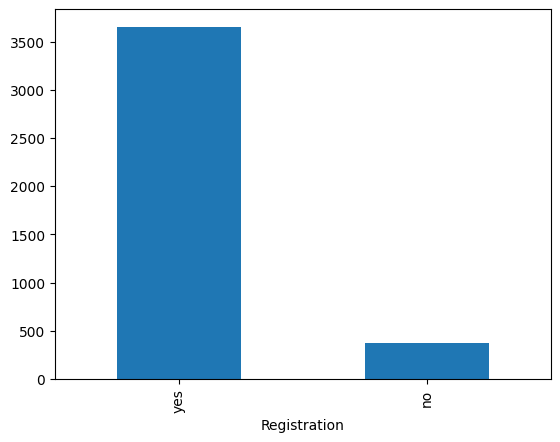

In [81]:
df['Registration'].value_counts().plot(kind='bar')

¿Y en porcentajes?

In [82]:
df['Registration'].value_counts(normalize=True)*100

Registration
yes    90.782609
no      9.217391
Name: proportion, dtype: float64

### Price

Price es nuestro target. ¿Còmo se distibuye?

<ipython-input-83-87e11caeb2c4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

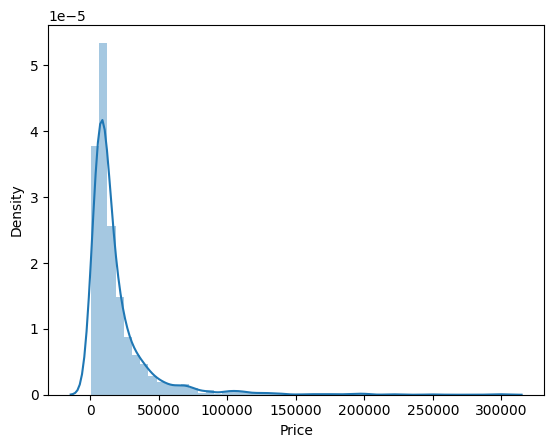

In [83]:
sns.distplot(df['Price'])

¿Tiene outliers? Graficar

<Axes: ylabel='Price'>

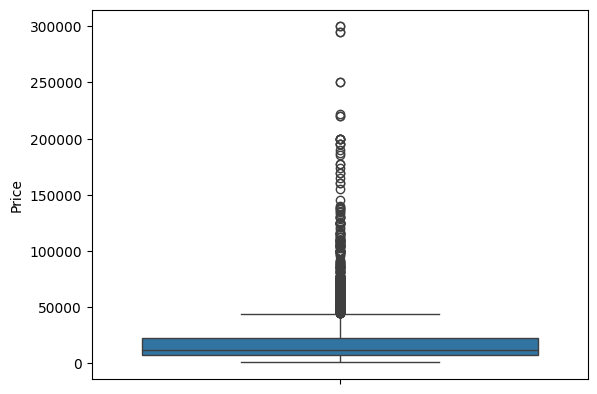

In [84]:
sns.boxplot(df['Price'])


### Mileage

¿Cómo se distribuye?

<ipython-input-85-b2a5404bd870>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

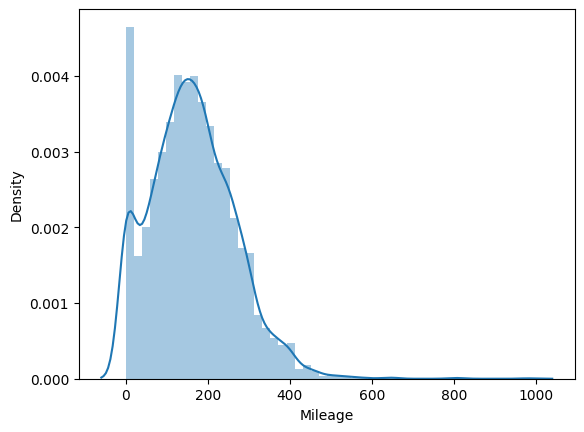

In [85]:
sns.distplot(df['Mileage'])

¿Hay outliers? Graficar

<Axes: ylabel='Mileage'>

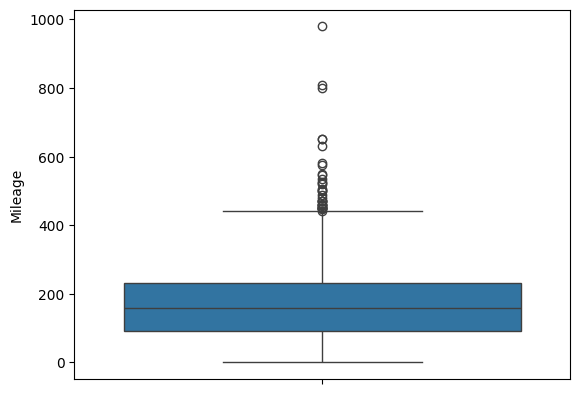

In [86]:
sns.boxplot(df['Mileage'])

### Body

¿Cuántos valores distintos puede tomar esta feature?

In [87]:
df['Body'].nunique()

6

¿Qué valores puede tomar?

In [88]:
df['Body'].unique()

array(['sedan', 'van', 'crossover', 'vagon', 'other', 'hatch'],
      dtype=object)

¿Con que frecuencia toma cada valor?


In [89]:
df['Body'].value_counts()

Body
sedan        1534
crossover     824
van           626
other         394
vagon         379
hatch         268
Name: count, dtype: int64

### Year

¿En que rango de años tenemos datos?

In [90]:
df['Year'].min()

1969

In [91]:
df['Year'].max()

2016

¿Hay alguna relación entre el año y el precio?

Graficar scatterplot

<Axes: xlabel='Year', ylabel='Price'>

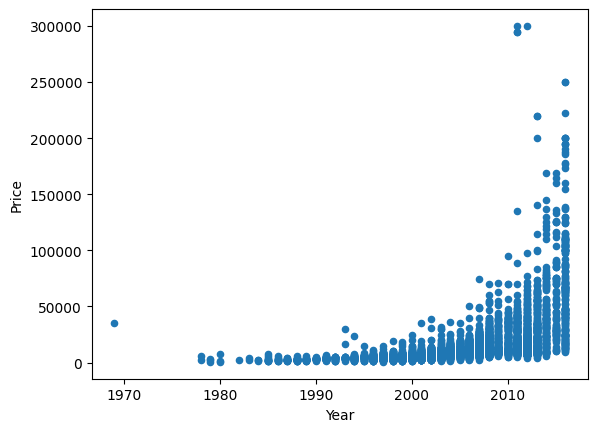

In [92]:
df.plot.scatter(x='Year', y='Price')

Graficar lineplot

<Axes: xlabel='Year'>

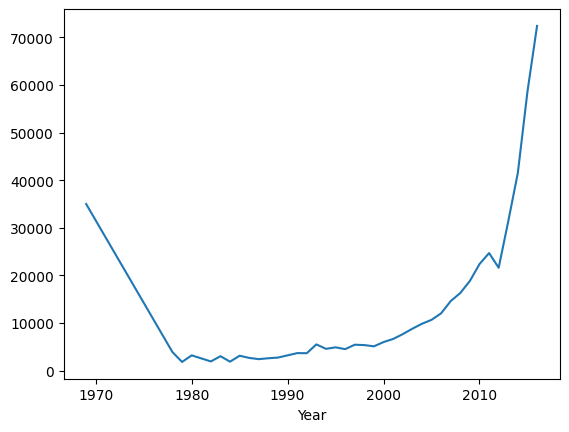

In [93]:
df.groupby('Year')['Price'].mean().plot()

In [94]:
#auto mas viejo?
df[df['Year'] == df['Year'].min()]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
810,Mercedes-Benz,34999.0,sedan,150,2.8,Petrol,yes,1969,S 280


¿Qué paso en el año 1970?

Imprimir las filas donde el año es menor a 1980

In [95]:
df[df['Year'] < 1980]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
288,Toyota,600.0,sedan,10,1.5,Petrol,yes,1979,Corolla
810,Mercedes-Benz,34999.0,sedan,150,2.8,Petrol,yes,1969,S 280
1025,Mercedes-Benz,2300.0,sedan,261,2.3,Gas,yes,1978,E-Class
1896,Mercedes-Benz,1950.0,sedan,1,2.0,Diesel,yes,1979,200
2122,Mercedes-Benz,2990.0,sedan,300,2.8,Gas,yes,1979,S 280
4319,Mercedes-Benz,5500.0,sedan,440,2.0,Petrol,yes,1978,E-Class


¿Hay alguna relación importante entre Year y Mileage? Graficar

<Axes: xlabel='Year', ylabel='Mileage'>

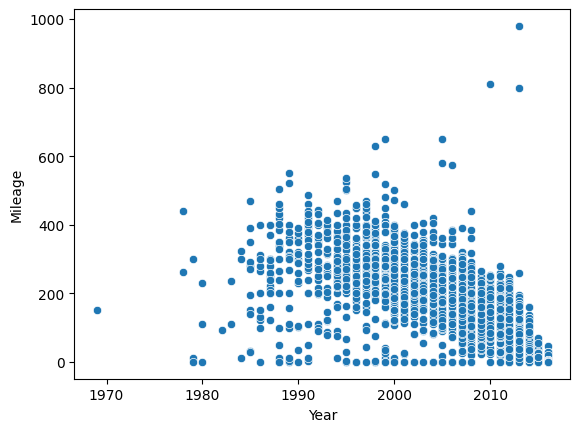

In [96]:
sns.scatterplot(x='Year', y='Mileage', data=df)

<Axes: xlabel='Year'>

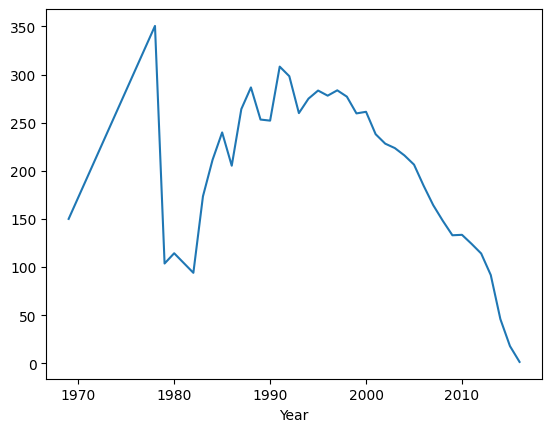

In [97]:
df.groupby('Year')['Mileage'].mean().plot()

### Model

¿Cuántos modelos distintos hay?

In [98]:
df['Model'].nunique()

306

¿Cuál es el que aparece más veces?

In [99]:
df['Model'].value_counts()

Model
E-Class             188
A6                  156
Vito                156
Kangoo              136
Camry               127
                   ... 
5                     1
21                    1
Vista                 1
T3 (Transporter)      1
Scion                 1
Name: count, Length: 306, dtype: int64

# Preprocesamiento

Vamos a descartar la variable Model por simplicidad

Descartar la columna model:

In [100]:
df.drop('Model', axis=1, inplace=True)

Vamos a hacer el preprocesamiento utilizando pipelines.

Para esto, primero que nada definimos una clase que nos permitirá seleccionar algunas features de nuestro dataset.

In [101]:
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline, make_union
from sklearn.base import BaseEstimator, TransformerMixin

In [102]:
class SelectColumns(BaseEstimator, TransformerMixin):
    def __init__(self, names=None):
        self.names = names

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X):
        return X[self.names]

Ahora, definiremos un pipeline que trata por un lado a variables categóricas y por el otro lado a variables numéricas.

Al final de todo, entrena un modelo decision tree regressor:

In [103]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

Separar el dataset en X e y:

In [104]:
X = df.drop('Price', axis=1)
y = df['Price']

Para esto, primero que nada necesitamos definir 2 listas:
- una que contenga el nombre de las features categóricas
- Otra que contenga el nombre de las features numéricas

Definir las listas cat_cols y num_cols:

In [111]:
#features categoricas
df_cat = X.select_dtypes('object').columns
#features numericas
df_num = X.select_dtypes('number').columns
df_cat, df_num

(Index(['Brand', 'Body', 'Engine Type', 'Registration'], dtype='object'),
 Index(['Mileage', 'EngineV', 'Year'], dtype='object'))

Separar los datos con un train test split. Para obtener todos los mismos resultados, usemos un random_state = 0 y un test_size=0.15

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

Ahora, entrenar el modelo y medir su performance sobre el set de evaluación. Recuerden que el pipeline que definimos anteriormente, ya hace el preprocesamiento necesario sobre los datos.

In [114]:
#def el pipeline
pipe = Pipeline([
    ("features", FeatureUnion([
        ("numerical", make_pipeline(SelectColumns(names=df_num), StandardScaler())),
        ("categorical", make_pipeline(SelectColumns(names=df_cat), OneHotEncoder(handle_unknown='ignore')))
    ])),
    ('model', DecisionTreeRegressor())
])

Medimos el MAE (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html)

In [115]:
pipe

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('numerical',
                                                 Pipeline(steps=[('selectcolumns',
                                                                  SelectColumns(names=Index(['Mileage', 'EngineV', 'Year'], dtype='object'))),
                                                                 ('standardscaler',
                                                                  StandardScaler())])),
                                                ('categorical',
                                                 Pipeline(steps=[('selectcolumns',
                                                                  SelectColumns(names=Index(['Brand', 'Body', 'Engine Type', 'Registration'], dtype='object'))),
                                                                 ('onehotencoder',
                                                                  OneHotEncoder(handle_unknown='ignore'))]))])),
                ('model', DecisionTreeRegressor())])

In [116]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('numerical',
                                                 Pipeline(steps=[('selectcolumns',
                                                                  SelectColumns(names=Index(['Mileage', 'EngineV', 'Year'], dtype='object'))),
                                                                 ('standardscaler',
                                                                  StandardScaler())])),
                                                ('categorical',
                                                 Pipeline(steps=[('selectcolumns',
                                                                  SelectColumns(names=Index(['Brand', 'Body', 'Engine Type', 'Registration'], dtype='object'))),
                                                                 ('onehotencoder',
                                                                  OneHotEncoder(handle_unknown='ignore'))]))])),
                ('model', DecisionTreeRegressor())])

Utilizando el método .score de el DecisionTreeRegressor (que por defecto calcula el R cuadrado) medir el R cuadrado en train y test:

In [117]:
pipe.score(X_train, y_train)

0.9933573254536819

In [118]:
#medimos la MAE
pipe.score(X_test, y_test)

0.7812719046522827

Qué conclusiones sacan de estos resultados?

Para mejorar el modelo, vamos a hacer una búsqueda exhaustiva de hiperparámetros utilizando grid search.

Importar GridSearchCV de sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [121]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor


Si vemos en la documentación, primero que nada debemos generar un listado de parámetros.

Vamos a definir nuesto listado de la siguiente manera:
- max_depth: 2,3,4,5,6
- min_samples_split: 1, 2, 3, 4, 5, 6
- min_samples_leaf: 1,2,3,4

Definir el diccionario de parámetros:

In [125]:
parameters = {
    "max_depth": [2,3,4,5,6],
    "min_samples_split": [1,2,3,4,5,6],
    "min_samples_leaf": [1,2,3,4]
}

Ahora,  como en la documentación de sklearn, definir un GridSearchCV y utilizarlo para nuestro pipeline con los parámetros que definimos anteriormente:

In [126]:
grid_search = GridSearchCV(pipe, parameters, cv=5, scoring='neg_mean_absolute_error')

In [127]:
grid_search.fit(X_train, y_train)

ValueError: Invalid parameter 'max_depth' for estimator Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('numerical',
                                                 Pipeline(steps=[('selectcolumns',
                                                                  SelectColumns(names=Index(['Mileage', 'EngineV', 'Year'], dtype='object'))),
                                                                 ('standardscaler',
                                                                  StandardScaler())])),
                                                ('categorical',
                                                 Pipeline(steps=[('selectcolumns',
                                                                  SelectColumns(names=Index(['Brand', 'Body', 'Engine Type', 'Registration'], dtype='object'))),
                                                                 ('onehotencoder',
                                                                  OneHotEncoder(handle_unknown='ignore'))]))])),
                ('model', DecisionTreeRegressor())]). Valid parameters are: ['memory', 'steps', 'verbose'].

Esto nos da error al ejecutarlo. Si vemos el mensaje de error "Check the list of available parameters with `estimator.get_params().keys()`."

¿Qué se imaginan que está pasando?

Probemos lo que sugiere el mensaje de error, checkear el listado de parámetros disponibles utilizando el método "get_params().keys()" de nuestro pipeline.

Obtener el listado de parámetros disponibles de nuestro pipeline:

In [128]:
get_params = pipe.get_params().keys()
get_params

dict_keys(['memory', 'steps', 'verbose', 'features', 'model', 'features__n_jobs', 'features__transformer_list', 'features__transformer_weights', 'features__verbose', 'features__numerical', 'features__categorical', 'features__numerical__memory', 'features__numerical__steps', 'features__numerical__verbose', 'features__numerical__selectcolumns', 'features__numerical__standardscaler', 'features__numerical__selectcolumns__names', 'features__numerical__standardscaler__copy', 'features__numerical__standardscaler__with_mean', 'features__numerical__standardscaler__with_std', 'features__categorical__memory', 'features__categorical__steps', 'features__categorical__verbose', 'features__categorical__selectcolumns', 'features__categorical__onehotencoder', 'features__categorical__selectcolumns__names', 'features__categorical__onehotencoder__categories', 'features__categorical__onehotencoder__drop', 'features__categorical__onehotencoder__dtype', 'features__categorical__onehotencoder__handle_unknown', 

Vemos que son muchos, pero si prestamos atención, vamos a ver que hay parámetros que comienzan con "features__" y "model__", justo los nombres con los que nosotros definimos a los elementos de nuestro pipeline.

Por lo tanto, al estar definidos dentro de un pipeline de sklearn, los nombres de los hiperparámetros de nuestro decision tree van a arrancar todos con "model__" (ya que es el nombre que definimos nosotros en nuestro pipeline).

Corregir el diccionario de parámetros:

In [129]:
parameters = {
    "model__max_depth": [2,3,4,5,6],
    "model__min_samples_split": [1,2,3,4,5,6],
    "model__min_samples_leaf": [1,2,3,4]
}

Volver a aplicar grid search con la nueva corrección:

Una vez que hicimos fit sobre nuestro estimador con GridSearchCV, podemos acceder a el atributo .best_params_ que nos dice cuáles son los parámetros que mejores resultados dieron:

In [130]:
grid_search = GridSearchCV(pipe, parameters, cv=5, scoring='neg_mean_absolute_error')

Si ahora utilizamos nuestro GridSeachCV ya fitteado para hacer predicciones (.predict()), utilizará por defecto los mejores parámetros que encontró durante el entrenamiento.

Generar las predicciones para train, test y medir las mismas métricas que antes (R cuadrado y mean absolute error).

In [132]:
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('features',
                                        FeatureUnion(transformer_list=[('numerical',
                                                                        Pipeline(steps=[('selectcolumns',
                                                                                         SelectColumns(names=Index(['Mileage', 'EngineV', 'Year'], dtype='object'))),
                                                                                        ('standardscaler',
                                                                                         StandardScaler())])),
                                                                       ('categorical',
                                                                        Pipeline(steps=[('selectcolumns',
                                                                                         SelectColumns(names=Index(['Brand', 'Body', 'Engine Type', 'Registration'], dtype='object'))),
                                                                                        ('onehotencoder',
                                                                                         OneHotEncoder(handle_unknown='ignore'))]))])),
                                       ('model', DecisionTreeRegressor())]),
             param_grid={'model__max_depth': [2, 3, 4, 5, 6],
                         'model__min_samples_leaf': [1, 2, 3, 4],
                         'model__min_samples_split': [1, 2, 3, 4, 5, 6]},
             scoring='neg_mean_absolute_error')

In [133]:
grid_search.best_params_

{'model__max_depth': 6,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 3}

In [135]:
#mae
print(mean_absolute_error(y_train, grid_search.predict(X_train)))
print(mean_absolute_error(y_test, grid_search.predict(X_test)))

4139.300154928538
4935.867885379011


In [137]:
#r al cuadrado
print(r2_score(y_train, grid_search.predict(X_train)))
print(r2_score(y_test, grid_search.predict(X_test)))

0.9014474452484443
0.8300760284636768
